In [14]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
# Load the dataset
df = pd.read_csv(r'E:\Rouhi_DEVELOPMENT\3)Python+Pyspark\final_proj\HeartDisease.csv')

df1=pd.DataFrame(df)

In [16]:
df1.head(5)

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,15.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,30.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,11.0,5.0,4.0


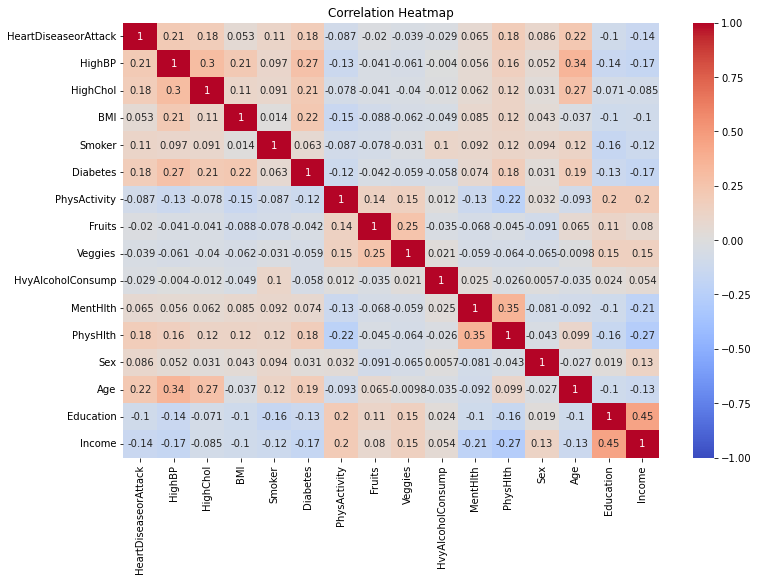

In [17]:
#Correlation Analysis
#correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [18]:
# Correlation with the target variable (HeartDiseaseorAttack)
target_correlations = correlation_matrix['HeartDiseaseorAttack'].sort_values(ascending=False)
print("Correlations with HeartDiseaseorAttack:")
print(target_correlations)

Correlations with HeartDiseaseorAttack:
HeartDiseaseorAttack    1.000000
Age                     0.221618
HighBP                  0.209361
PhysHlth                0.181698
HighChol                0.180765
Diabetes                0.180272
Smoker                  0.114441
Sex                     0.086096
MentHlth                0.064621
BMI                     0.052904
Fruits                 -0.019790
HvyAlcoholConsump      -0.028991
Veggies                -0.039167
PhysActivity           -0.087299
Education              -0.099600
Income                 -0.141011
Name: HeartDiseaseorAttack, dtype: float64


In [19]:
feature_names = ["Age" ,"HighBP" ,"PhysHlth" ,"HighChol" ,"Diabetes" ,"Smoker" ,"Sex" ,"MentHlth" ,"BMI"]
X = df1[feature_names]
y = df1['HeartDiseaseorAttack']

In [20]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [21]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.253451,Age
1,1.301353,HighBP
2,1.208712,PhysHlth
3,1.166621,HighChol
4,1.162747,Diabetes
5,1.046618,Smoker
6,1.027744,Sex
7,1.185854,MentHlth
8,1.113396,BMI


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model= LogisticRegression()

# Train and evaluate  model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9068708609271523